## Test cross-correlations on GCI AK DAS data

originally by Ethan Williams 2023-03-18

modified by Marine Denolle (1/3/2024)

Import modules

In [1]:
%matplotlib inline
import os
import sys
sys.path.append('../src/')
import h5py
import numpy as np
import matplotlib.pyplot as plt
import psf_module as psf # our PSF module

# from scipy.signal import detrend, filtfilt, butter

# from obspy import UTCDateTime

Make the list of files

In [2]:
# data files
dir0='/Users/marinedenolle/homer'
fdir = dir0+'/kkfln/'
flist = np.array(os.listdir(fdir))
ftime = np.array([psf.get_tstamp(fname) for fname in flist])
index = np.argsort(np.array(ftime)-ftime[0])
flist = flist[index]
ftime = ftime[index]


Prepare cross correlation job

In [3]:

# dictionary for the Xcorr job.
recmin = 1000 # minimal source
recmax = 3000 # receiver channel
fmin = 0.5 # minimal frequency
fmax = 10. # maximal frequency
whiten = True # whiten the data 
onebit = True # one bit normalization
srcx = recmin # channel source location    
nns = 600 # number of time samples for the xcorr.

pdict = {'srcx': srcx, 'recmin': recmin, 'recmax': recmax, 'nns': nns, \
        'fmin': fmin, 'fmax': fmax, 'whiten': whiten, 'onebit': onebit}


In [4]:
fdir

'/Users/marinedenolle/homer/kkfln/'

In [5]:
xc = psf.simple_xc(fdir,flist)
xc.compute_xc(pdict)


file at work /Users/marinedenolle/homer/kkfln/ /Users/marinedenolle/homer/kkfln/decimator2_2024-01-03_21.02.06_UTC.h5
File 1/746
File 2/746
File 3/746
File 4/746
File 5/746
File 6/746
File 7/746
File 8/746
File 9/746
File 10/746
File 11/746
File 12/746
File 13/746
File 14/746
File 15/746
File 16/746
File 17/746
File 18/746
File 19/746
File 20/746
File 21/746
File 22/746
File 23/746
File 24/746
File 25/746
File 26/746
File 27/746
File 28/746
File 29/746
File 30/746
File 31/746
File 32/746
File 33/746
File 34/746
File 35/746
File 36/746
File 37/746
File 38/746
File 39/746
File 40/746
File 41/746
File 42/746
File 43/746
File 44/746
File 45/746
File 46/746
File 47/746
File 48/746
File 49/746
File 50/746
File 51/746
File 52/746
File 53/746
File 54/746
File 55/746
File 56/746
File 57/746
File 58/746
File 59/746
File 60/746
File 61/746
File 62/746
File 63/746
File 64/746
File 65/746
File 66/746
File 67/746
File 68/746
File 69/746
File 70/746
File 71/746
File 72/746
File 73/746
File 74/746
Fil

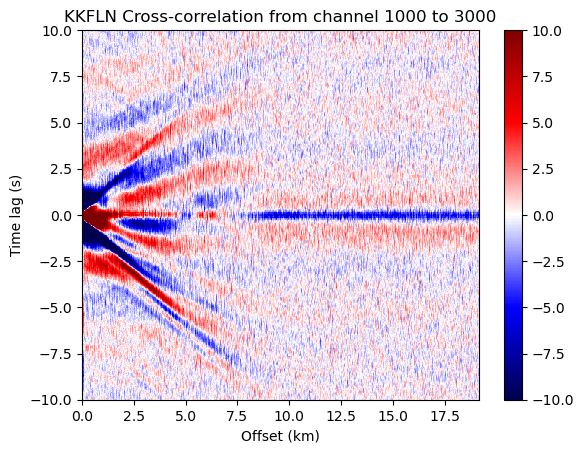

In [6]:
plt.figure(); v = 10
plt.pcolormesh(xc.offset/1E3,xc.lags,xc.trxc.T,vmin=-v,vmax=v,cmap='seismic')
plt.xlim([min(xc.offset)/1E3,max(xc.offset)/1E3])
plt.ylim([-10,10])
plt.xlabel('Offset (km)')
plt.ylabel('Time lag (s)')
plt.title('KKFLN Cross-correlation from channel ' + str(recmin) + ' to ' + str(recmax ))
plt.colorbar()
plt.savefig('KKFLN_xc_'+str(recmin)+'_'+str(recmax)+'.png',dpi=300,bbox_inches='tight')

Calulcate quick dispersion

In [7]:
idx = np.logical_and(xc.offset>=0,xc.offset<=7500)
shot = xc.trxc[idx,:]
off = xc.offset[idx]
lag = xc.lags
shotf = np.fft.rfft(shot,axis=1)

vs = np.linspace(100,3000,50)
nv = len(vs)
ns = len(lag)
nx = len(off)
frq = np.fft.rfftfreq(ns,d=1./25.)
disp = np.zeros((nv,ns//2+1))
for iv in range(nv):
    shift = shotf.copy()
    for ix in range(nx):
        shift[ix,:] *= np.exp(2j*np.pi*frq*off[ix]/vs[iv])
    disp[iv,:] = abs(np.mean(np.real(shift),axis=0))


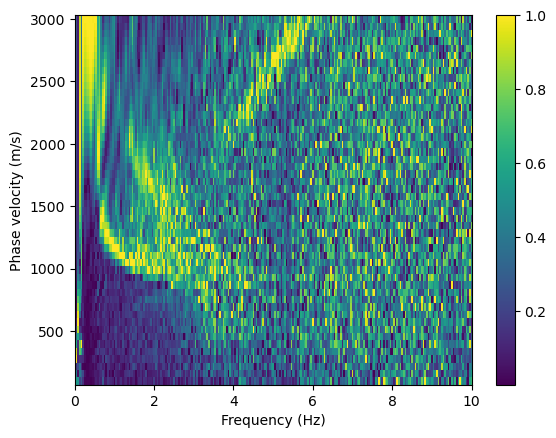

In [8]:
# can also normalize
disp /= np.tile(np.max(disp,axis=0),(nv,1))

plt.figure()
plt.pcolormesh(frq,vs,disp)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase velocity (m/s)')
plt.colorbar()
plt.savefig('KKFLN_disp_'+str(recmin)+'_'+str(recmax)+'.png',dpi=300,bbox_inches='tight')

In [9]:
# data files
dir0='/Users/marinedenolle/homer'
fdir = dir0+'/terra/'
flist = np.array(os.listdir(fdir))
ftime = np.array([psf.get_tstamp(fname) for fname in flist])
index = np.argsort(np.array(ftime)-ftime[0])
flist = flist[index]
ftime = ftime[index]


In [10]:

# dictionary for the Xcorr job.
recmin = 1000 # minimal source
recmax = 6000 # receiver channel
fmin = 0.5 # minimal frequency
fmax = 5. # maximal frequency
whiten = True # whiten the data 
onebit = True # one bit normalization
srcx = recmin # channel source location    
nns = 600 # number of time samples for the xcorr.

pdict = {'srcx': srcx, 'recmin': recmin, 'recmax': recmax, 'nns': nns, \
        'fmin': fmin, 'fmax': fmax, 'whiten': whiten, 'onebit': onebit}


In [11]:
xc = psf.simple_xc(fdir,flist)
xc.compute_xc(pdict)


file at work /Users/marinedenolle/homer/terra/ /Users/marinedenolle/homer/terra/decimator2_2024-01-04_00.06.45_UTC.h5
File 1/1408
File 2/1408
File 3/1408
File 4/1408
File 5/1408
File 6/1408
File 7/1408
File 8/1408
File 9/1408
File 10/1408
File 11/1408
File 12/1408
File 13/1408
File 14/1408
File 15/1408
File 16/1408
File 17/1408
File 18/1408
File 19/1408
File 20/1408
File 21/1408
File 22/1408
File 23/1408
File 24/1408
File 25/1408
File 26/1408
File 27/1408
File 28/1408
File 29/1408
File 30/1408
File 31/1408
File 32/1408
File 33/1408
File 34/1408
File 35/1408
File 36/1408
File 37/1408
File 38/1408
File 39/1408
File 40/1408
File 41/1408
File 42/1408
File 43/1408
File 44/1408
File 45/1408
File 46/1408
File 47/1408
File 48/1408
File 49/1408
File 50/1408
File 51/1408
File 52/1408
File 53/1408
File 54/1408
File 55/1408
File 56/1408
File 57/1408
File 58/1408
File 59/1408
File 60/1408
File 61/1408
File 62/1408
File 63/1408
File 64/1408
File 65/1408
File 66/1408
File 67/1408
File 68/1408
File 69

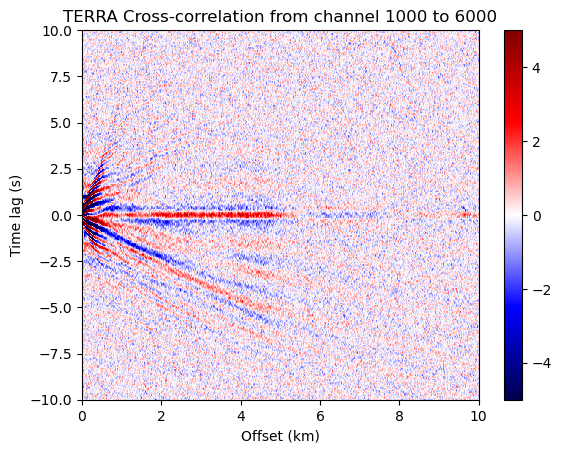

In [ ]:
plt.figure(); v = 5
plt.pcolormesh(xc.offset/1E3,xc.lags,xc.trxc.T,vmin=-v,vmax=v,cmap='seismic')
plt.xlim([min(xc.offset)/1E3,max(xc.offset)/1E3])
plt.ylim([-10,10])
plt.xlim([0,10])
plt.xlabel('Offset (km)')
plt.ylabel('Time lag (s)')
plt.title('TERRA Cross-correlation from channel ' + str(recmin) + ' to ' + str(recmax ))
plt.colorbar()
plt.savefig('TERRA_xc_'+str(recmin)+'_'+str(recmax)+'.png',dpi=300,bbox_inches='tight')

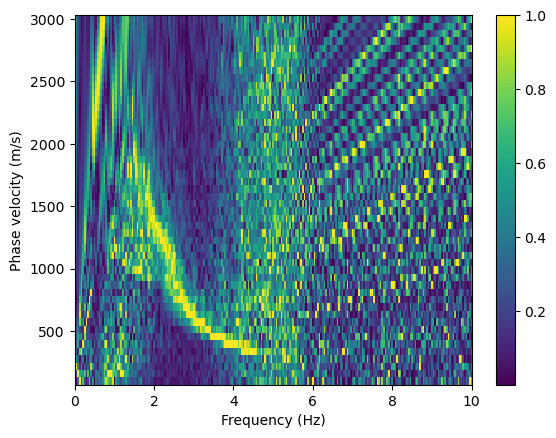

In [ ]:
idx = np.logical_and(xc.offset>=0,xc.offset<=7500)
shot = xc.trxc[idx,:]
off = xc.offset[idx]
lag = xc.lags
shotf = np.fft.rfft(shot,axis=1)

vs = np.linspace(100,3000,50)
nv = len(vs)
ns = len(lag)
nx = len(off)
frq = np.fft.rfftfreq(ns,d=1./25.)
disp = np.zeros((nv,ns//2+1))
for iv in range(nv):
    shift = shotf.copy()
    for ix in range(nx):
        shift[ix,:] *= np.exp(2j*np.pi*frq*off[ix]/vs[iv])
    disp[iv,:] = abs(np.mean(np.real(shift),axis=0))


# can also normalize
disp /= np.tile(np.max(disp,axis=0),(nv,1))

plt.figure()
plt.pcolormesh(frq,vs,disp)
plt.xlim([0,10])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase velocity (m/s)')
plt.colorbar()

plt.savefig('TERRA_disp_'+str(recmin)+'_'+str(recmax)+'.png',dpi=300,bbox_inches='tight')